# Test lecture fichier

- lecture et prétraitement d'un fichier
- création du dictionnaire
- élimination des stopwords présents dans le dictionnaire
- stemming des mots

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/constancescherer/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/constancescherer/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Lecture du fichier

In [2]:
#constance
entree = "/Users/constancescherer/Desktop/addic7ed/3999___Brooklyn_Nine-Nine/01/01__Pilot.txt"
#entree = "01__Pilot_(1).txt" #premier episode de Lost
fichier = open(entree, "r")
lignes = fichier.readlines()
fichier.close()
texte = ""
for ligne in lignes :
    if ligne[0] not in "0123456789":
        texte += ligne

#print(texte)

## Création du dictionnaire

In [4]:
corpus = [texte]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
dico1 = vectorizer.get_feature_names()
#print(dico1)
#print(X.toarray())
print(len(dico1))

927


## Élimination des stopwords

### Liste stopwords internet

In [66]:
entree = "ressources/stopwords4.txt"
fichier = open(entree, "r")
lignes = fichier.readlines()
fichier.close()
sw = []
for ligne in lignes :
    sw.append(ligne[:-1])

### Stopwords nltk

In [50]:
sw = stopwords.words('english')

In [69]:
corpus = [texte]
vectorizer = CountVectorizer(stop_words = sw)
X = vectorizer.fit_transform(corpus)
dico2 = vectorizer.get_feature_names()
nb_occ = X.toarray()[0]

#print(dico2)
#print(X.toarray())
print(len(dico2))

693


## Stemming

In [70]:
ps = PorterStemmer()
dico_stem = []
for word in dico2 :
    dico_stem.append(ps.stem(word))
print(len(dico_stem))

693


In [71]:
cpt = 0
for i in range(0, len(dico2)) :
    if dico2[i] == dico_stem[i] :
        cpt += 1

cpt

397

In [62]:
dico2[20:40]

['ahh',
 'ahhh',
 'alert',
 'alive',
 'amazing',
 'amy',
 'anymore',
 'anyway',
 'apartment',
 'apologize',
 'apparently',
 'appropriately',
 'arms',
 'arrest',
 'arrests',
 'ass',
 'assigned',
 'assigning',
 'attention',
 'awesome']

In [63]:
dico_stem[20:40]

['ahh',
 'ahhh',
 'alert',
 'aliv',
 'amaz',
 'ami',
 'anymor',
 'anyway',
 'apart',
 'apolog',
 'appar',
 'appropri',
 'arm',
 'arrest',
 'arrest',
 'ass',
 'assign',
 'assign',
 'attent',
 'awesom']

## Affichage des mots les plus fréquents

### Dictionnaire sans les stopwords

,Word,Nb_occ
0,captain,21
1,detective,20
2,ratko,17
3,sir,11
4,tie,10
5,gonna,9
6,look,9
7,santiago,8
8,fine,8
9,font,8


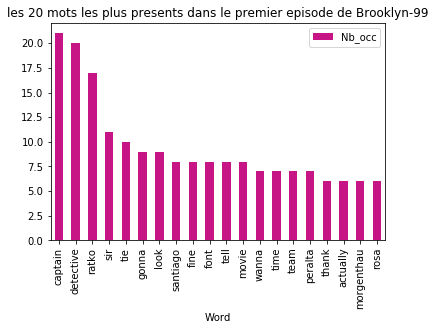

In [72]:
n = 20
ind = np.argpartition(nb_occ, -n)[-n:]
ind = ind[np.argsort(-nb_occ[ind])]
words = [dico2[i] for i in ind]

words_count = []
i = 0
for i in range(len(words)):
    words_count.append(nb_occ[ind[i]])
    
df = pd.DataFrame(np.column_stack([words, words_count]), columns=['Word', 'Nb_occ'])
df.Nb_occ=pd.to_numeric(df.Nb_occ)

titre = "les "+str(n)+" mots les plus presents dans le premier episode de Brooklyn-99"
hist = df.plot(kind='bar', x='Word', y='Nb_occ', color='mediumvioletred', title =titre).get_figure()
path_fig = "img/"+titre+'.png'
hist.savefig(path_fig,  bbox_inches="tight")
df

### Dictionnaire sans les stopwords + stemming

,Word,Nb_occ
0,captain,21
1,detect,20
2,ratko,17
3,sir,11
4,tie,10
5,gonna,9
6,look,9
7,santiago,8
8,fine,8
9,font,8


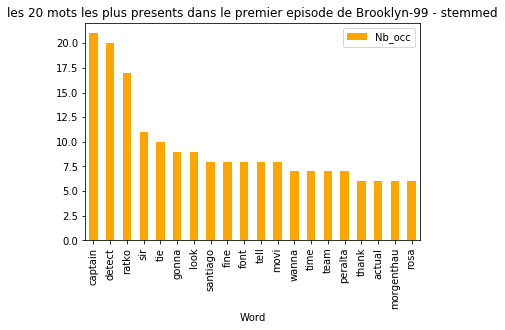

In [73]:
n = 20
ind = np.argpartition(nb_occ, -n)[-n:]
ind = ind[np.argsort(-nb_occ[ind])]
words = [dico_stem[i] for i in ind]

words_count = []
i = 0
for i in range(len(words)):
    words_count.append(nb_occ[ind[i]])
    
df = pd.DataFrame(np.column_stack([words, words_count]), columns=['Word', 'Nb_occ'])
df.Nb_occ=pd.to_numeric(df.Nb_occ)

titre = "les "+str(n)+" mots les plus presents dans le premier episode de Brooklyn-99 - stemmed"
hist = df.plot(kind='bar', x='Word', y='Nb_occ', color='orange', title =titre).get_figure()
path_fig = "img/"+titre+'.png'
hist.savefig(path_fig,  bbox_inches="tight")
df